Ucitavanje potrebnik biblioteka:

In [170]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nivuc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nivuc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [208]:
train_podaci = pd.read_csv("train_podaci.csv")
test_podaci = pd.read_csv("test_podaci.csv")

# DODATNA ANALIZA

In [192]:
not_disaster_tweets = train_podaci[train_podaci['target'] == False]['text']
disaster_tweets = train_podaci[train_podaci['target'] == True]['text']

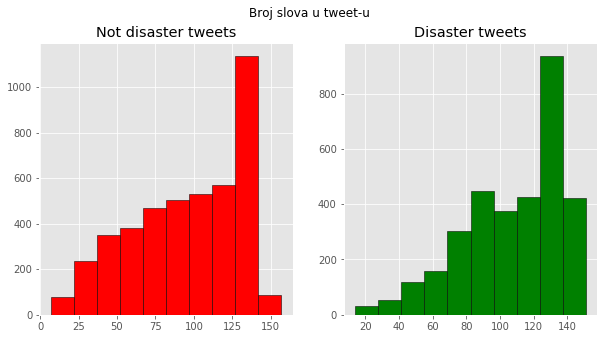

In [174]:
# Broj slova u tweetu
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

broj_slova_u_nd_tweetovima = [len(tweet) for tweet in not_disaster_tweets]
ax1.hist(broj_slova_u_nd_tweetovima, color='red', edgecolor='black')
ax1.set_title('Not disaster tweets')

broj_slova_u_d_tweetovima = [len(tweet) for tweet in disaster_tweets]
ax2.hist(broj_slova_u_d_tweetovima, color='green', edgecolor='black')
ax2.set_title('Disaster tweets')

fig.suptitle('Broj slova u tweet-u')
plt.show()

# primjecujemo da 

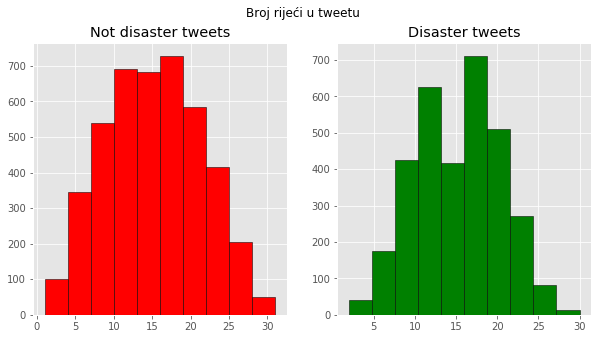

In [175]:
# Broj riječi u tweetu
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# Broj riječi u tweetovima koji su lažni
broj_rijeci_u_nd_tweetovima = [len(tweet.split()) for tweet in not_disaster_tweets]
ax1.hist(broj_rijeci_u_nd_tweetovima, color='red', edgecolor='black')
ax1.set_title('Not disaster tweets')

# Broj riječi u tweetovima koji su istiniti
broj_rijeci_u_d_tweetovima = [len(tweet.split()) for tweet in disaster_tweets]
ax2.hist(broj_rijeci_u_d_tweetovima, color='green', edgecolor='black')
ax2.set_title('Disaster tweets')

fig.suptitle('Broj rijeći u tweetu')
plt.show()


Text(0.5, 0.98, 'Average word length in each tweet')

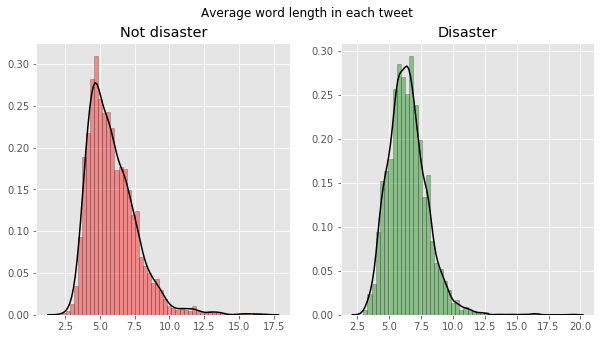

In [176]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

# Odredujemo prosjecni broj rijeci u tweetovima koji su lažni
duljine_rijeci_nd = [[len(rijec) for rijec in tweet.split()] for tweet in not_disaster_tweets]
avg_duljine_rijeci_nd = [np.mean(x) for x in duljine_rijeci_nd]

sns.distplot(avg_duljine_rijeci_nd, ax = ax1, color='black', 
             hist_kws={"edgecolor" : "black", "color": "red"})
ax1.set_title('Not disaster')

# Odredujemo prosjecni broj rijeci u tweetovima koji su istiniti
duljine_rijeci_d = [[len(rijec) for rijec in tweet.split()] for tweet in disaster_tweets]
avg_duljine_rijeci_d = [np.mean(x) for x in duljine_rijeci_d]

sns.distplot(avg_duljine_rijeci_d, ax = ax2, color='black',
            hist_kws={"edgecolor" : "black", "color": "green"})
ax2.set_title('Disaster')

fig.suptitle('Average word length in each tweet')

In [177]:
def rastavi_recenice_na_rijeci(tweetovi):
    return [rijec for tweet in tweetovi for rijec in tweet.split()]

<BarContainer object of 10 artists>

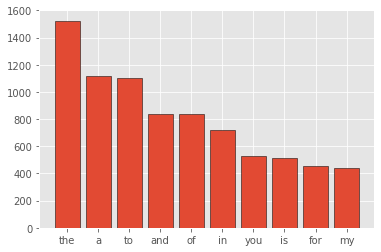

In [178]:
# Odredujemo broj ponavljanja rijeci svim tweetovima koji su lažni
broj_ponavljanja_rijeci_nd_STOP = defaultdict(int)
broj_ponavljanja_rijeci_nd = defaultdict(int)

for rijec in rastavi_recenice_na_rijeci(not_disaster_tweets):
    if rijec in stop:
        broj_ponavljanja_rijeci_nd_STOP[rijec] += 1
    else:
        broj_ponavljanja_rijeci_nd[rijec] += 1
        
# Dohvaćamo 10 najčešćih riječi
najcesce_rijeci_nd_STOP = sorted(broj_ponavljanja_rijeci_nd_STOP.items(), key = lambda x : x[1], reverse = True)[:10]
najcesce_rijeci_nd = sorted(broj_ponavljanja_rijeci_nd.items(), key = lambda x : x[1], reverse = True)[:10]

x, y = zip(*najcesce_rijeci_nd_STOP)
plt.bar(x, y, edgecolor = 'black')

<BarContainer object of 10 artists>

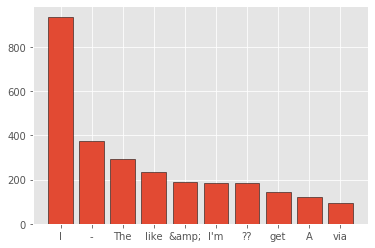

In [179]:
x, y = zip(*najcesce_rijeci_nd)
plt.bar(x, y, edgecolor = 'black')

<BarContainer object of 10 artists>

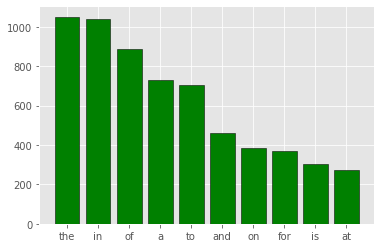

In [180]:
# Odredujemo broj ponavljanja rijeci u svim tweetovima koji su istiniti
broj_ponavljanja_rijeci_d_STOP = defaultdict(int)
broj_ponavljanja_rijeci_d = defaultdict(int)

for rijec in rastavi_recenice_na_rijeci(disaster_tweets):
    if rijec in stop:
        broj_ponavljanja_rijeci_d_STOP[rijec] += 1
    else:
        broj_ponavljanja_rijeci_d[rijec] += 1
        
# Dohvaćamo 10 najčešćih riječi
najcesce_rijeci_d_STOP = sorted(broj_ponavljanja_rijeci_d_STOP.items(), key = lambda x : x[1], reverse = True)[:10]
najcesce_rijeci_d = sorted(broj_ponavljanja_rijeci_d.items(), key = lambda x : x[1], reverse = True)[:10]

x, y = zip(*najcesce_rijeci_d_STOP)
plt.bar(x, y, color = "green", edgecolor = 'black')

<BarContainer object of 10 artists>

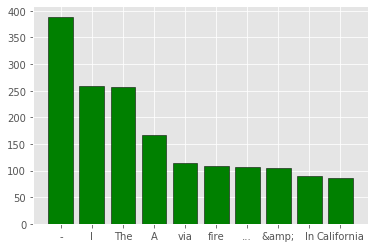

In [181]:
x, y = zip(*najcesce_rijeci_d)
plt.bar(x, y, color = "green", edgecolor = 'black')

In [182]:
import string
znakovi = string.punctuation

<BarContainer object of 20 artists>

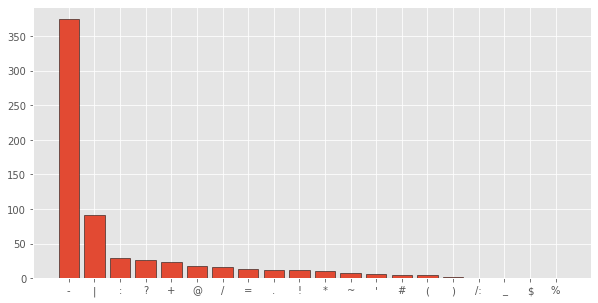

In [183]:
plt.figure(figsize=(10,5))

broj_ponavljanja_znakova_nd = defaultdict(int)

for rijec in rastavi_recenice_na_rijeci(not_disaster_tweets):
    if rijec in znakovi:
        broj_ponavljanja_znakova_nd[rijec] += 1

x, y = zip(*sorted(broj_ponavljanja_znakova_nd.items(), key = lambda x : x[1], reverse = True))

plt.bar(x, y, edgecolor = "black")

<BarContainer object of 18 artists>

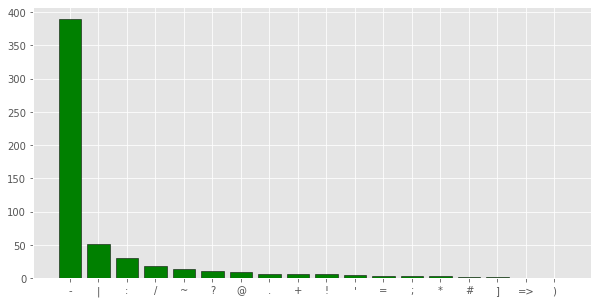

In [184]:
plt.figure(figsize=(10,5))

broj_ponavljanja_znakova_d = defaultdict(int)

for rijec in rastavi_recenice_na_rijeci(disaster_tweets):
    if rijec in znakovi:
        broj_ponavljanja_znakova_d[rijec] += 1

x, y = zip(*sorted(broj_ponavljanja_znakova_d.items(), key = lambda x : x[1], reverse = True))

plt.bar(x, y, color = "green", edgecolor = "black")

In [185]:
def najcesce_susjedne_rijeci(rijeci, n = None):
    # Želimo samo 'bigrame'
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    broj_ponavljanja = vectorizer.fit_transform(rijeci).sum(axis = 0) # Sumiraj po stupcima
    
    frekv_izraza = [(rijec, broj_ponavljanja[0, index]) for rijec, index in vectorizer.vocabulary_.items()]
    frekv_izraza = sorted(frekv_izraza, key = lambda x : x[1], reverse = True)
    
    return frekv_izraza[:n]

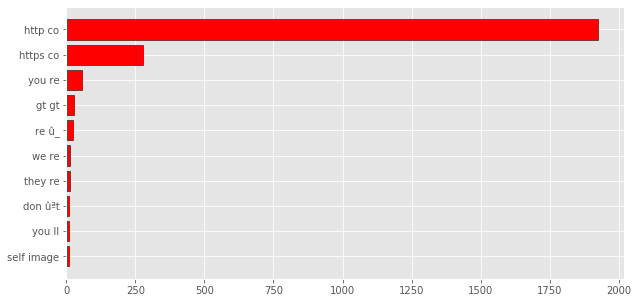

In [186]:
plt.figure(figsize=(10,5))
najcesci_izrazi = najcesce_susjedne_rijeci(rastavi_recenice_na_rijeci(not_disaster_tweets), 10)

x, y = zip(*dict(najcesci_izrazi).items())

plt.barh(x, y, color = "red", edgecolor = "black")
plt.gca().invert_yaxis()

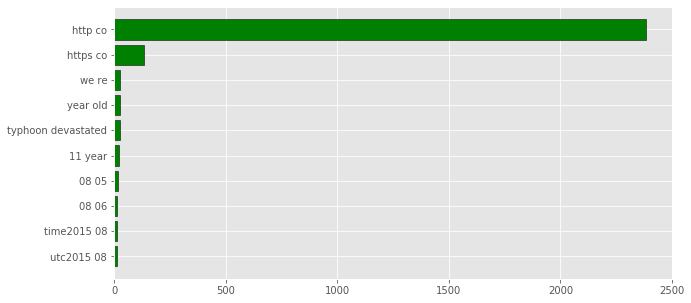

In [187]:
plt.figure(figsize=(10,5))
najcesci_izrazi = najcesce_susjedne_rijeci(rastavi_recenice_na_rijeci(disaster_tweets), 10)

x, y = zip(*dict(najcesci_izrazi).items())

plt.barh(x, y, color = "green", edgecolor = "black")
plt.gca().invert_yaxis()

# CISCENJE

In [188]:
def ukloni_URL(tweet):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def ukloni_emoji(tweet):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def ukloni_interpunkcijske_znakove(tweet):
    table = str.maketrans('', '', string.punctuation)
    return tweet.translate(table)

In [189]:
# Ukloni za train podatke
train_podaci['text'] = train_podaci['text'].apply(lambda x : ukloni_URL(x))
train_podaci['text'] = train_podaci['text'].apply(lambda x: ukloni_emoji(x))
train_podaci['text'] = train_podaci['text'].apply(lambda x: ukloni_interpunkcijske_znakove(x))
# train_podaci['text'] = train_podaci['text'].apply(lambda x: zamjeni_izraze(x))

# Ukloni za test podatke
test_podaci['text'] = test_podaci['text'].apply(lambda x : ukloni_URL(x))
test_podaci['text'] = test_podaci['text'].apply(lambda x: ukloni_emoji(x))
test_podaci['text'] = test_podaci['text'].apply(lambda x: ukloni_interpunkcijske_znakove(x))
# test_podaci['text'] = test_podaci['text'].apply(lambda x: zamjeni_izraze(x))

In [217]:
# train_podaci.to_csv(r'C:\Users\nivuc\Documents\Fakultet\SU\train_podaci_ocisceni.csv', index = False)
# test_podaci.to_csv(r'C:\Users\nivuc\Documents\Fakultet\SU\test_podaci_ocisceni.csv', index = False)

# Radi preformanse ucitat cemo vec ociscene podatke koje bi dobili da smo pozvali i 'zamjeni_izraze' funkciju
train_podaci = pd.read_csv("train_podaci_ocisceni.csv")
test_podaci = pd.read_csv("test_podaci_ocisceni.csv")

not_disaster_tweets = train_podaci[train_podaci['target'] == False]['text']
disaster_tweets = train_podaci[train_podaci['target'] == True]['text']

In [218]:
def rastavi_recenice_samo_na_rijeci(tweetovi):
    return [[rijec.lower() for rijec in tweet.split() if((rijec.isalpha() == 1) and (rijec.lower() not in stop))] for tweet in tweetovi]

In [219]:
spojeni_podaci = pd.concat([train_podaci, test_podaci])

spojeni_podaci_rijeci = rastavi_recenice_samo_na_rijeci(spojeni_podaci['text'])

In [220]:
embedding_dict = {}
with open('glove.6B.100d.txt', 'r', encoding = "utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors
f.close()

In [221]:
MAX_LEN = 50
tokenizer_obj = Tokenizer()
# Sortira riječi po frekvenciji => prva najčešča
tokenizer_obj.fit_on_texts(spojeni_podaci_rijeci)
# Zamjeni riječi u tekstu s brojem koji je dobiven u prijašnjem koraku
sequences = tokenizer_obj.texts_to_sequences(spojeni_podaci_rijeci)

# Osigramo da svaki vektor je jednake duljine
tweet_pad = pad_sequences(sequences, maxlen = MAX_LEN, truncating = 'post', padding = 'post')

In [222]:
rijeci = tokenizer_obj.word_index
broj_rijeci = len(rijeci) + 1

embedding_matrix = np.zeros((broj_rijeci, 100))

for rijec, index in (rijeci.items()):
    if index > broj_rijeci:
        continue
    
    emb_vec = embedding_dict.get(rijec)
    if emb_vec is not None:
        embedding_matrix[index] = emb_vec

# PRILAGODI

In [223]:
model = Sequential()

embedding = Embedding(broj_rijeci, 100, embeddings_initializer = Constant(embedding_matrix),
                   input_length = MAX_LEN, trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation='sigmoid'))

optimzer = Adam(learning_rate = 1e-5)

model.compile(loss = 'binary_crossentropy', optimizer = optimzer, metrics = ['accuracy'])

In [224]:
podaci_za_treniranje = tweet_pad[:train_podaci.shape[0]]
podaci_za_testiranje = tweet_pad[train_podaci.shape[0]:]

X_train, X_test, y_train, y_test = train_test_split(podaci_za_treniranje, train_podaci['target'].values, test_size = 0.15)

print('Shape of train', X_train.shape)
print("Shape of Validation ", X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [225]:
history = model.fit(X_train, y_train, batch_size = 4, epochs=15, validation_data = (X_test, y_test), verbose = 2)

Train on 6471 samples, validate on 1142 samples
Epoch 1/15
 - 27s - loss: 0.6915 - accuracy: 0.5634 - val_loss: 0.6876 - val_accuracy: 0.6016
Epoch 2/15
 - 34s - loss: 0.6862 - accuracy: 0.5648 - val_loss: 0.6726 - val_accuracy: 0.6016
Epoch 3/15
 - 35s - loss: 0.6323 - accuracy: 0.6466 - val_loss: 0.5528 - val_accuracy: 0.7636
Epoch 4/15
 - 35s - loss: 0.5818 - accuracy: 0.7198 - val_loss: 0.5298 - val_accuracy: 0.7601
Epoch 5/15
 - 32s - loss: 0.5655 - accuracy: 0.7316 - val_loss: 0.5195 - val_accuracy: 0.7618
Epoch 6/15
 - 33s - loss: 0.5578 - accuracy: 0.7361 - val_loss: 0.5110 - val_accuracy: 0.7706
Epoch 7/15
 - 33s - loss: 0.5514 - accuracy: 0.7425 - val_loss: 0.5102 - val_accuracy: 0.7688
Epoch 8/15
 - 33s - loss: 0.5496 - accuracy: 0.7484 - val_loss: 0.5048 - val_accuracy: 0.7750
Epoch 9/15
 - 34s - loss: 0.5416 - accuracy: 0.7495 - val_loss: 0.4999 - val_accuracy: 0.7793
Epoch 10/15
 - 35s - loss: 0.5474 - accuracy: 0.7480 - val_loss: 0.5000 - val_accuracy: 0.7785
Epoch 11/15

In [233]:
y_pre = model.predict(podaci_za_testiranje)
y_pre = np.round(y_pre).astype(int).reshape(3263)

In [235]:
target_test_podaci = pd.read_csv('submission.csv')

In [269]:
def odredi_tocnost(predvideno, istina):
    tocno_pogodeno = 0
    for i in range (0, len(predvideno)):
        if(predvideno[i] == istina['target'][i]):
            tocno_pogodeno += 1
            
    return tocno_pogodeno / len(predvideno)

odredi_tocnost(y_pre, target_test_podaci)

0.7873122893043212

In [271]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.feature_extraction.text import TfidfVectorizer

In [267]:
X_train, X_test, y_train, y_test = train_test_split(podaci_za_treniranje, train_podaci['target'].values, test_size = 0.15)

rf = RandomForestClassifier(random_state = 42)
rf = RandomForestClassifier(n_estimators = 100, max_depth = None, n_jobs = -1)
rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [270]:
odredi_tocnost(y_pred, target_test_podaci)

0.5604203152364273